# 1. 向量链式法则

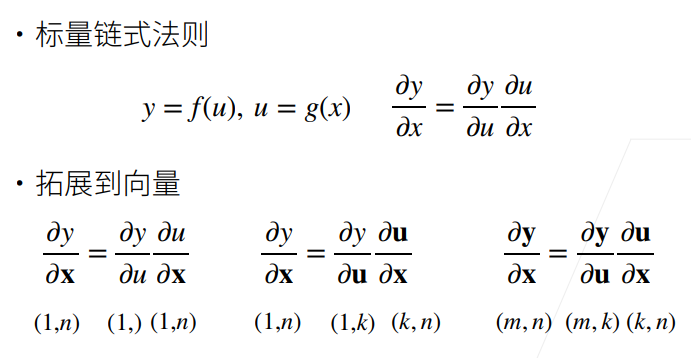

① 例子1是一个线性回归的例子，如下图所示。

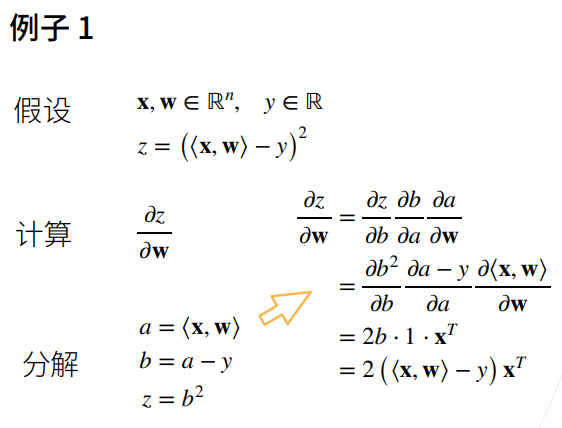

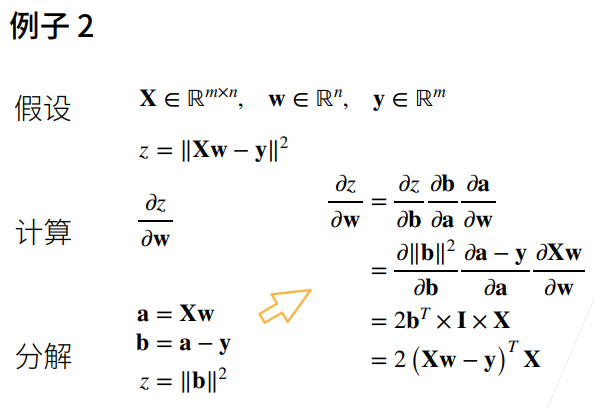

# 2. 自动求导

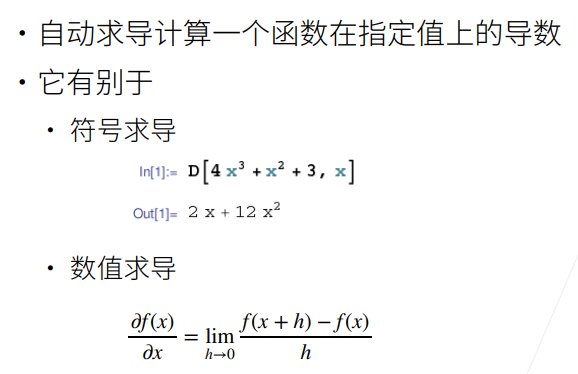

# 3. 计算图

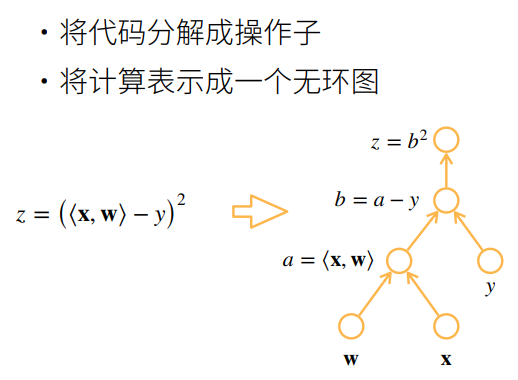

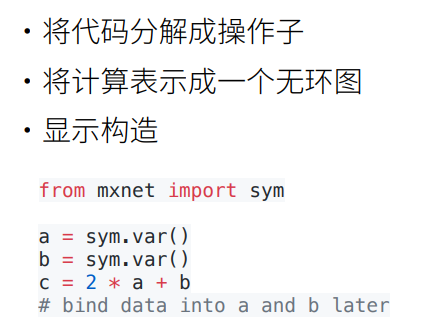

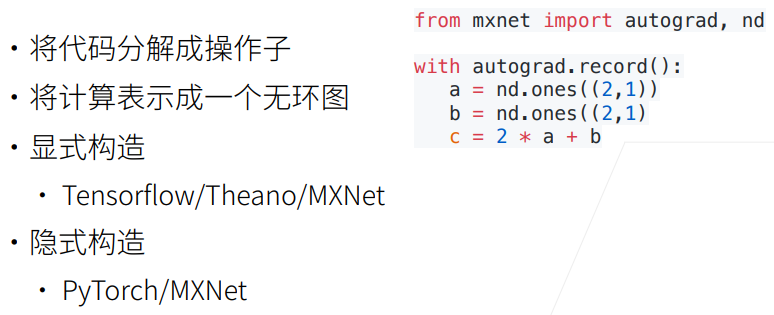

# 4. 两种模型

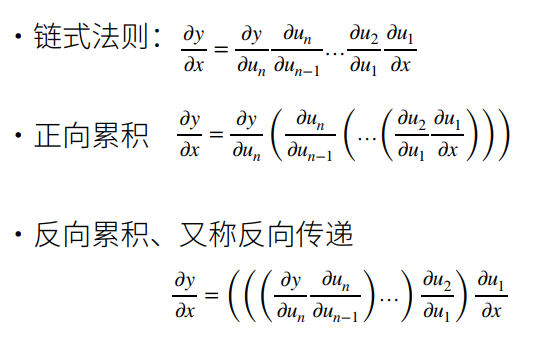

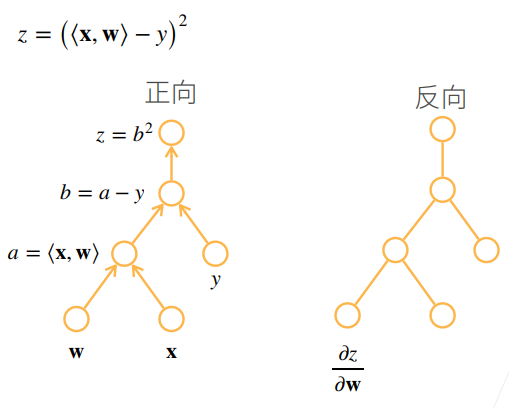

① b是之前计算的结果，是一个已知的值。

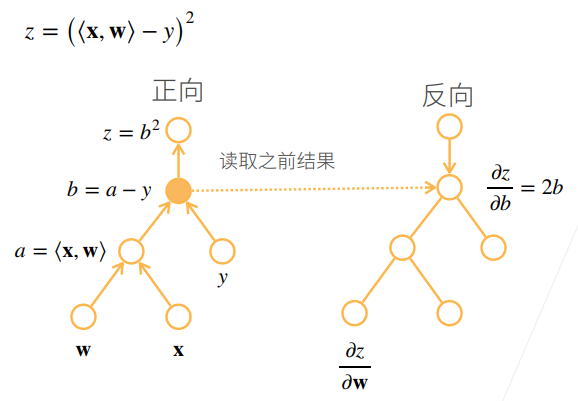

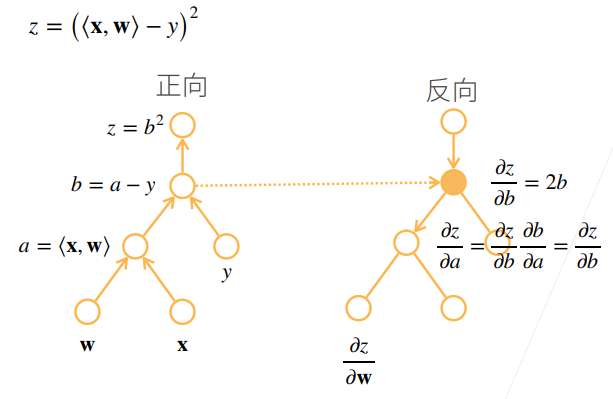

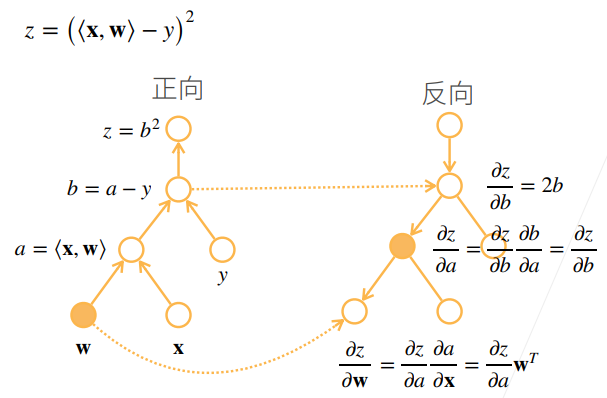

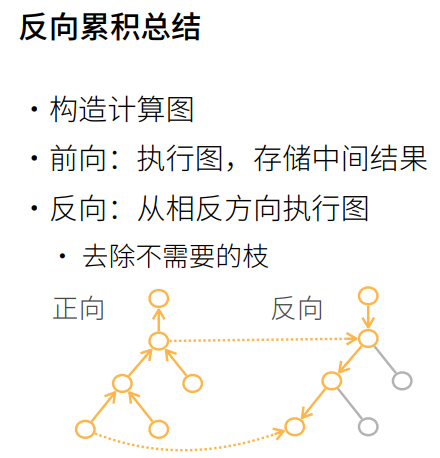

# 5. 复杂度

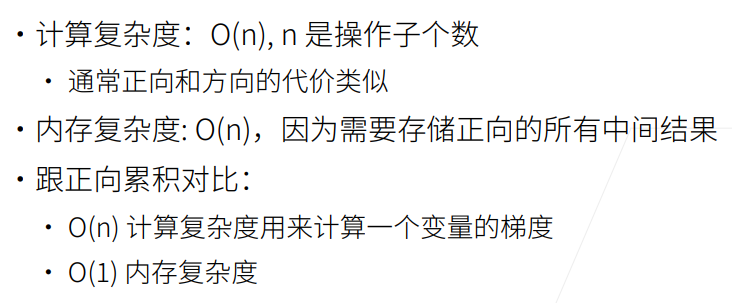

# 6. 自动求导

① 假设想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量x求导。

In [1]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

② 在外面计算y关于x的梯度之前，需要一个地方来存储梯度。

In [2]:
import torch
x = torch.arange(4.0)
x.requires_grad_(True) # 等价于 x = torch.arange(4.0,requires_grad=True)
print(x.grad) # 默认为None

None


In [3]:
import torch
x = torch.arange(4.0,requires_grad=True)
print(x.grad) # x.grad是存梯度的地方，默认为None，即还没有求导求出梯度出来

None


③ 现在计算y。

In [4]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
print(y) # grad_fn是隐式的构造了梯度函数

tensor(28., grad_fn=<MulBackward0>)


④ 通过调用反向传播函数来自动计算y关于x每个分量的梯度。

In [5]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward() # 反向传播后会有梯度计算出来
print(x.grad) # 访问导数，即访问梯度
print(x.grad == 4 * x) # 4 * x 是 2 * x * x 的导数

tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


⑤ 计算x的另一个函数。

In [6]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
x.grad.zero_() # y.backward() 后才能产生梯度，才能梯度清零，没有反向传播，无法梯度清零
y = x.sum() # 这里的y是一个标量，sum函数其实就是x_1+x_2+...x_n，求偏导自然是全1啊
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


⑥ 在深度学习中，目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和。

In [7]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
# 对非标量调用 'backward' 需要传入一个 'gradient' 参数，该参数指定微分函数
x.grad.zero_()
y = x * x  # 这里的y不是一个标量，这是一个向量
print(y)
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # y.sum()后就讲向量转为标量了，对标量求导
x.grad

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

⑦ 将某些计算移动到记录的计算图之外。

In [8]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x
print(y)
u = y.detach() # y.detach把y当作一个常数，而不是关于x的一个函数
print(y.detach())
print(u)
z = u * x
z.sum().backward()
x.grad == u

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])
tensor([0., 1., 4., 9.])


tensor([True, True, True, True])

In [9]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x  # 这里的y是关于x的函数
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

⑧ 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），仍然可以计算得到的变量的梯度。

In [10]:
def f(a):
    b = a * 2
    while b.norm() < 1000: # norm是L2范数
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

a = torch.randn(size=(),requires_grad=True)
print(a)
d = f(a)
d.backward()
print(a.grad)
print(d/a)
a.grad == d/a # d是a的线性函数，所以导数就是斜率d/a

tensor(-0.7712, requires_grad=True)
tensor(204800.)
tensor(204800., grad_fn=<DivBackward0>)


tensor(True)